## Asteroid Diameter Prediction
#### AML Advance Python
**Vahid Hadavi**

**Team Members**:
- Kshitiz Bhattarai
- Mandil Karki
- Pranay Gurung
- Raj Kumar Phagami
- Yug Dev Bhandari

### Importing Libraries

In [93]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Reading Dataset

Importing Datasets and converting into pandas dataframe

In [94]:
asteroid_df = pd.read_csv("Asteroid.csv", low_memory=False)
asteroid_df.head(5)

,full_name,a,e,G,i,om,w,q,ad,per_y,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,...,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,...,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,...,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,...,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,...,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.09589


In [95]:
asteroid_df.shape

(839736, 27)

In [96]:
asteroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       839736 non-null  object 
 1   a               839734 non-null  float64
 2   e               839736 non-null  float64
 3   G               119 non-null     float64
 4   i               839736 non-null  float64
 5   om              839736 non-null  float64
 6   w               839736 non-null  float64
 7   q               839736 non-null  float64
 8   ad              839730 non-null  float64
 9   per_y           839735 non-null  float64
 10  data_arc        823947 non-null  float64
 11  condition_code  838743 non-null  object 
 12  n_obs_used      839736 non-null  int64  
 13  H               837042 non-null  float64
 14  diameter        137681 non-null  object 
 15  extent          18 non-null      object 
 16  albedo          136452 non-null  float64
 17  rot_per   

Statistical Description

In [97]:
asteroid_df.describe()

,a,e,G,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,rot_per,GM,BV,UB,IR,moid
count,839734.000000,839736.000000,119.000000,839736.000000,839736.000000,839736.000000,839736.000000,839730.000000,839735.000000,823947.000000,839736.000000,837042.000000,136452.000000,18796.000000,1.400000e+01,1021.000000,979.000000,1.00,8.228140e+05
mean,2.843217,0.155633,0.178739,8.950009,168.501641,181.076593,2.404732,3.385707,6.859544,5660.187025,254.617708,16.786069,0.130052,21.136772,7.821928e+00,0.769212,0.364396,-0.33,1.423511e+00
std,37.327031,0.093888,0.134603,6.666273,103.096571,104.024110,2.233138,12.746419,252.172503,4192.420393,363.004548,1.821274,0.109983,73.131751,1.678880e+01,0.088625,0.095780,NaN,2.251048e+00
min,-32588.942986,0.000000,-0.250000,0.007546,0.000388,0.001666,0.070511,0.773684,0.000000,0.000000,2.000000,-1.100000,0.001000,0.004389,2.100000e-09,0.580000,0.120000,-0.33,3.437640e-07
25%,2.385244,0.091453,0.100000,4.069043,80.212344,91.039551,1.971939,2.775342,3.683896,3599.000000,50.000000,15.900000,0.053000,4.210000,1.022225e-03,0.700000,0.289000,-0.33,9.785395e-01
50%,2.644219,0.143654,0.190000,7.257311,160.296065,181.669812,2.225494,3.037745,4.299860,5792.000000,118.000000,16.800000,0.078000,6.653000,6.192500e-01,0.743000,0.360000,-0.33,1.237880e+00
75%,2.996035,0.199400,0.250000,12.256026,252.206645,271.523344,2.578162,3.357958,5.185951,7228.000000,292.000000,17.600000,0.188000,12.624250,6.500000e+00,0.850000,0.439000,-0.33,1.590610e+00
max,3043.149073,1.201134,0.600000,175.188725,359.999800,359.999833,80.424175,6081.841956,167877.712688,72684.000000,9325.000000,33.200000,1.000000,3240.000000,6.262840e+01,1.077000,0.655000,-0.33,7.950130e+01


### Checking and Handling Missing Values 

In [98]:
asteroid_df.isnull().sum()

full_name              0
a                      2
e                      0
G                 839617
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15789
condition_code       993
n_obs_used             0
H                   2694
diameter          702055
extent            839718
albedo            703284
rot_per           820940
GM                839722
BV                838715
UB                838757
IR                839735
spec_B            838070
spec_T            838756
neo                    6
pha                16922
moid               16922
dtype: int64

In [99]:
#percentage of missing values
percent_missing_values = asteroid_df.isnull().mean()*100
percent_missing_values  = percent_missing_values.to_dict()

In [100]:
missing_value = pd.DataFrame({'column': percent_missing_values.keys(),'percentage': percent_missing_values.values()})
missing_value.sort_values('percentage', ascending=False)
missing_value.head()

,column,percentage
0,full_name,0.000000
1,a,0.000238
2,e,0.000000
3,G,99.985829
4,i,0.000000


**Removing the columns having the percentage of missing values **

Filtering the columns of  missing values

In [101]:
columns_to_drop = missing_value["column"][missing_value["percentage"]>83.7]
columns_to_drop 

3           G
15     extent
16     albedo
17    rot_per
18         GM
19         BV
20         UB
21         IR
22     spec_B
23     spec_T
Name: column, dtype: object

In [102]:
asteroid_df.drop(columns = columns_to_drop, inplace = True)

In [103]:
asteroid_df.head()

,full_name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,neo,pha,moid
0,1 Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,939.4,N,N,1.59478
1,2 Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,545,N,N,1.23324
2,3 Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,246.596,N,N,1.03454
3,4 Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,525.4,N,N,1.13948
4,5 Astraea,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0,2861,6.85,106.699,N,N,1.09589


After dropping the columns we got 17 columns out of 27

In [104]:
asteroid_df.shape

(839736, 17)

#### Deleting rows with missing values

In [105]:
cleaned_df= asteroid_df.dropna()
cleaned_df.head()

,full_name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,neo,pha,moid
0,1 Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,939.4,N,N,1.59478
1,2 Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,545,N,N,1.23324
2,3 Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,246.596,N,N,1.03454
3,4 Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,525.4,N,N,1.13948
4,5 Astraea,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0,2861,6.85,106.699,N,N,1.09589


After deleting the rows with missing values we got 136799 rows out of 839736 

In [106]:
cleaned_df.shape

(136799, 17)

In [107]:
# dropped rows in which 'diameter','data_arc' or 'albedo' value is missing
# df=df.dropna(subset = ['diameter', 'albedo', 'data_arc'])

In [108]:
cleaned_df.isnull().sum()

full_name         0
a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
diameter          0
neo               0
pha               0
moid              0
dtype: int64

### Feature Engineering

Checking the datatypes

In [109]:
cleaned_df.dtypes

full_name          object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
diameter           object
neo                object
pha                object
moid              float64
dtype: object

the datatype of diameter is object which points to the string. as our goal is to predict the diameter its should be in float

In [110]:
convert = {'diameter':float, 'condition_code':int}
cleaned_df = cleaned_df.astype(convert)

In [111]:
cleaned_df.dtypes

full_name          object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code      int32
n_obs_used          int64
H                 float64
diameter          float64
neo                object
pha                object
moid              float64
dtype: object

### Detecting and Handling Outliers

In [112]:
cleaned_df.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,moid
count,136799.000000,136799.000000,136799.000000,136799.000000,136799.000000,136799.000000,136799.000000,136799.000000,136799.000000,136799.000000,136799.000000,136799.000000,136799.000000,136799.000000
mean,2.815888,0.145463,10.303347,169.803300,181.884334,2.403829,3.227947,4.888089,8956.946966,0.434097,663.578045,15.176059,5.500852,1.421257
std,1.526870,0.077461,6.798582,102.707099,103.555784,0.516640,2.904628,25.610338,6132.104613,1.859232,581.451742,1.407433,9.411398,0.512734
min,0.626226,0.000489,0.021855,0.000735,0.004466,0.081882,0.999956,0.495569,1.000000,0.000000,5.000000,3.200000,0.002500,0.000166
25%,2.538616,0.089683,5.099060,82.320868,91.883804,2.070107,2.866315,4.044861,6283.000000,0.000000,218.000000,14.400000,2.782000,1.083570
50%,2.751931,0.138552,9.351827,160.454411,183.642049,2.365466,3.168750,4.565250,7508.000000,0.000000,488.000000,15.300000,3.969000,1.386400
75%,3.092843,0.191057,13.684521,256.090771,271.735774,2.686515,3.469049,5.439325,9667.000000,0.000000,962.000000,16.100000,5.758000,1.700150
max,389.145964,0.984348,170.323647,359.990858,359.995174,40.465671,772.201080,7676.742943,72684.000000,9.000000,9325.000000,29.900000,939.400000,39.507000


In [113]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_data = cleaned_df.select_dtypes(include=numerics)
num_data.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,moid
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,939.400,1.59478
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,545.000,1.23324
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,246.596,1.03454
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,525.400,1.13948
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0,2861,6.85,106.699,1.09589


In [114]:
Q1 = num_data.quantile(0.25)
Q3 =num_data.quantile(0.75)
IQR = Q3-Q1
IQR

a                    0.554228
e                    0.101374
i                    8.585461
om                 173.769903
w                  179.851970
q                    0.616408
ad                   0.602733
per_y                1.394464
data_arc          3384.000000
condition_code       0.000000
n_obs_used         744.000000
H                    1.700000
diameter             2.976000
moid                 0.616580
dtype: float64

In [ ]:
# outliers
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    if IQR > 0:
        print("IQR value for column %s is: %s" % (col, IQR))
        global outlier_free_list
        global filtered_data

        lower_range = Q1 - 1.5 * IQR
        upper_range = Q3 + 1.5 * IQR
        outlier_free_list = [x for x in data[col] if (
            (x > lower_range) & (x < upper_range))]
        filtered_data = data.loc[data[col].isin(outlier_free_list)]

for i in num_data.columns:
    if i == num_data.columns[0]:
      removeOutliers(num_data, i)
    else:
      removeOutliers(filtered_data, i)

### Visualization

histogram of diameter 

25.917027579673878


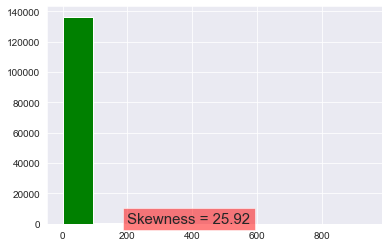

In [338]:
from scipy.stats import skew
skew_data = num_data['diameter'].skew()
print(skew_data)
# sns.displot(num_data['diameter'])
plt.text(200, 500, 'Skewness = '+str(round(skew_data,2)), fontsize = 15, 
         bbox = dict(facecolor = 'red', alpha = 0.5))
# plt.text(0.5, 0.5,skew_data, ha='center', va='center', size=30)
num_data['diameter'].hist(color='green')
plt.savefig('diameter_hist.png')
plt.show()

To check the relationship between the variables 

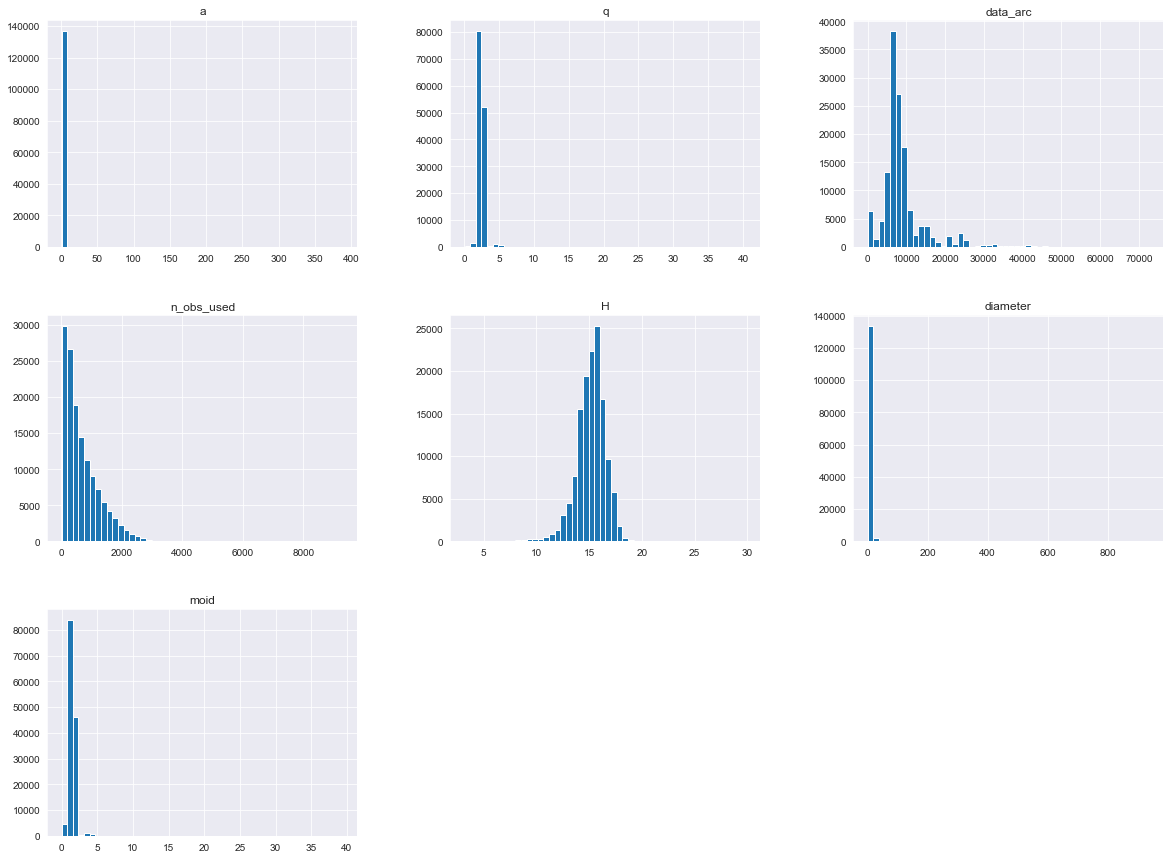

In [340]:
cleaned_df.hist(bins=50, figsize=(20,15))
plt.savefig('hist.png')

In [118]:
num_data.shape

(136799, 14)

In [119]:
cleaned_df.columns

Index(['full_name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'diameter', 'neo', 'pha', 'moid'],
      dtype='object')

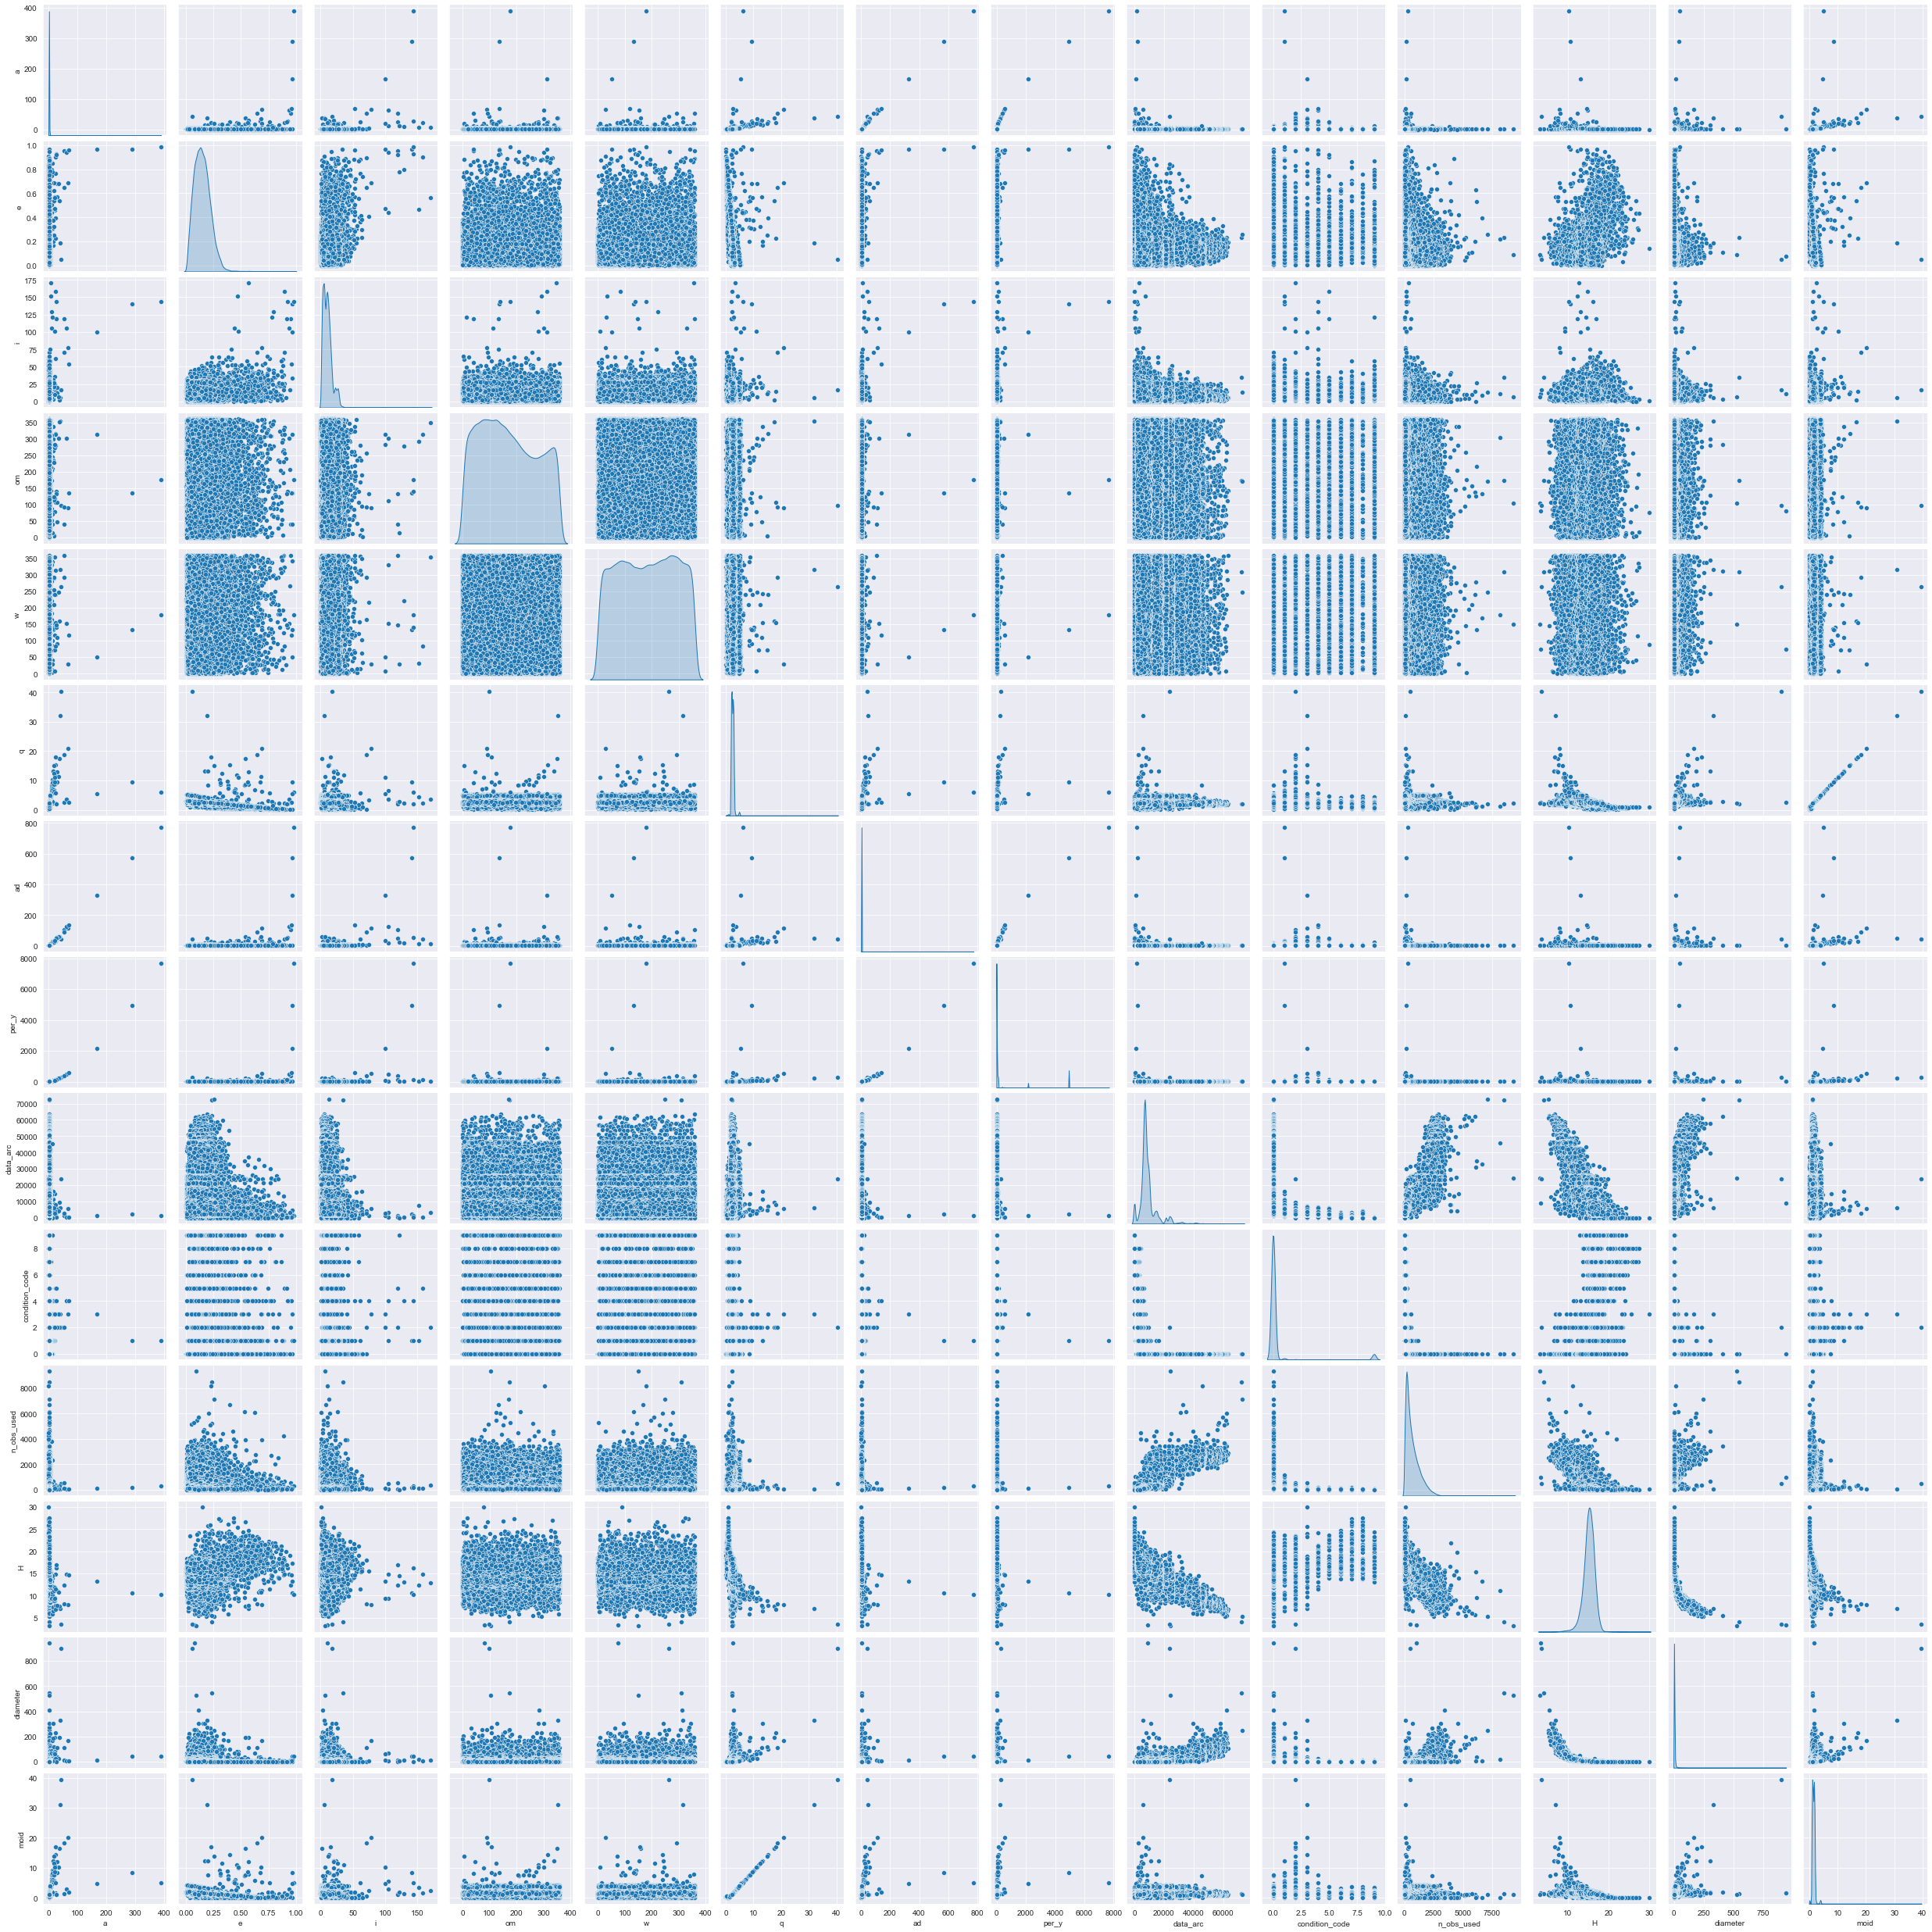

In [120]:
sns.pairplot(num_data, diag_kind='kde')
plt.savefig('pairplot.png')

#### Feature Selection

In [121]:
#getting the heat map to check the correlation between the numerical variables
cleaned_df.head()

,full_name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,neo,pha,moid
0,1 Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,939.400,N,N,1.59478
1,2 Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,545.000,N,N,1.23324
2,3 Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,246.596,N,N,1.03454
3,4 Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,525.400,N,N,1.13948
4,5 Astraea,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0,2861,6.85,106.699,N,N,1.09589


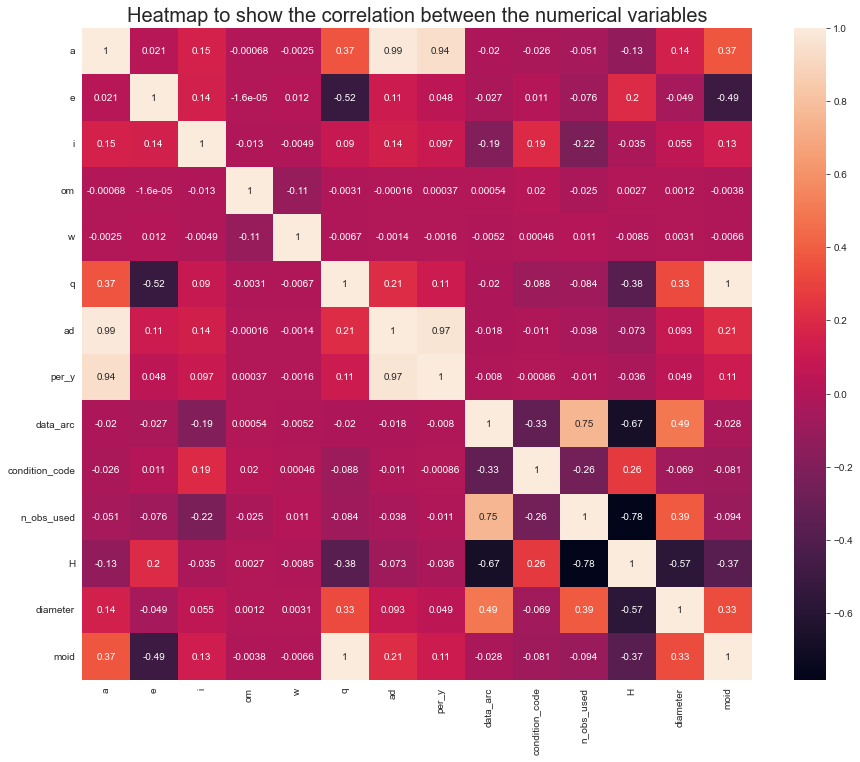

In [122]:
correlation=num_data.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(correlation,annot=True,annot_kws={'size':10})
plt.title("Heatmap to show the correlation between the numerical variables", fontsize=20)
plt.savefig("heamap.jpg")

From the heatmap we can see that a, q, ad, per_y,moid, per: all these features are strongly correlated. similarly, 
H is the only variable is negatively correlated with diameter. However, rot_per, e,i, w and om are less correlated with the diameter.

In [123]:
# Dropping the columns with low correlation
cleaned_df.drop(['om', 'w', 'per_y', 'e', 'i', 'condition_code', 'ad'],axis=1, inplace=True)
cleaned_df.shape

(136799, 10)

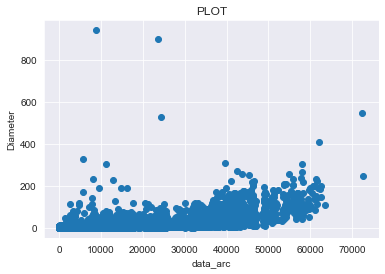

In [124]:
sns.set_style('darkgrid')

plt.scatter(num_data.data_arc , num_data.diameter)
plt.xlabel('data_arc')
plt.ylabel('Diameter')
plt.title('PLOT')
plt.show()

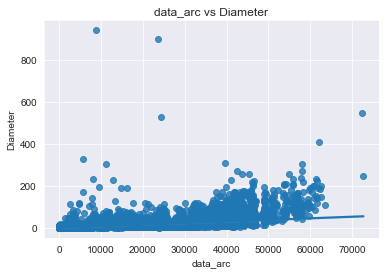

In [311]:
sns.set_style('darkgrid')

sns.regplot(x="data_arc",y="diameter",data=num_data)
plt.xlabel('data_arc')
plt.ylabel('Diameter')
plt.title('data_arc vs Diameter')
plt.savefig('data_arc vs diameter.png')
plt.show()

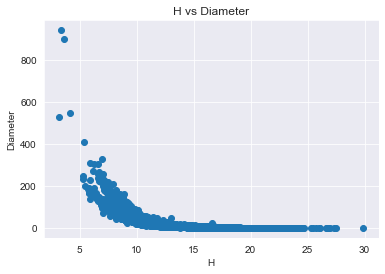

In [312]:
plt.scatter(num_data.H , num_data.diameter)
plt.xlabel('H')
plt.ylabel('Diameter')
plt.title('H vs Diameter')
plt.savefig('H vs diameter.png')
plt.show()

### Handling Categorical Columns

In [150]:
cleaned_df.drop(['full_name'], axis =1 , inplace = True)

In [198]:
categoricalData = cleaned_df.select_dtypes(include=['object']).copy()
categoricalData.head(5)

,neo,pha
0,N,N
1,N,N
2,N,N
3,N,N
4,N,N


### OneHotEncoding

In [199]:
cleaned_df['neo'].value_counts()

N    135952
Y       847
Name: neo, dtype: int64

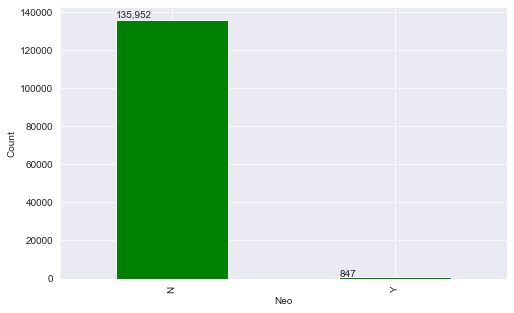

In [313]:
plt.figure(figsize=(8,5))
ax = cleaned_df.groupby('neo').size().plot(kind='bar',color='green')
# ax.set_title("# of transaction which is flagged as fraud per transaction type")
ax.set_xlabel("Neo")
ax.set_ylabel("Count")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.savefig('neo.png')

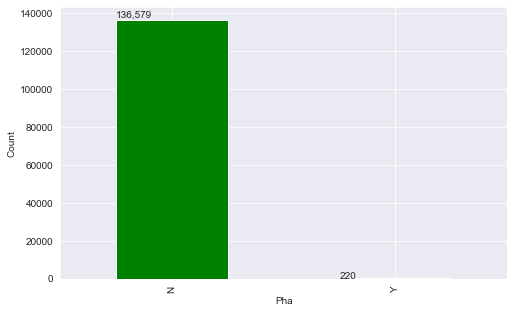

In [202]:
plt.figure(figsize=(8,5))
ax = cleaned_df.groupby('pha').size().plot(kind='bar',color='green')
# ax.set_title("# of transaction which is flagged as fraud per transaction type")
ax.set_xlabel("Pha")
ax.set_ylabel("Count")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

In [203]:
new_cols = pd.get_dummies(categoricalData, columns=['neo','pha'], drop_first=True)
new_cols.neo_Y.unique()

array([0, 1], dtype=uint8)

In [204]:
#concatenating the dataframes
new_df = pd.concat([cleaned_df,new_cols],axis = 1)
new_df.head()

,a,q,data_arc,n_obs_used,H,diameter,neo,pha,moid,neo_Y,pha_Y
0,2.769165,2.558684,8822.0,1002,3.34,939.400,N,N,1.59478,0,0
1,2.772466,2.133865,72318.0,8490,4.13,545.000,N,N,1.23324,0,0
2,2.669150,1.983332,72684.0,7104,5.33,246.596,N,N,1.03454,0,0
3,2.361418,2.151909,24288.0,9325,3.20,525.400,N,N,1.13948,0,0
4,2.574249,2.082324,63431.0,2861,6.85,106.699,N,N,1.09589,0,0


In [205]:
#dcropping the categorical variables neo and pha after changing to numerical
new_df = new_df.drop(['neo' , 'pha'], axis = 1)
new_df.head()

,a,q,data_arc,n_obs_used,H,diameter,moid,neo_Y,pha_Y
0,2.769165,2.558684,8822.0,1002,3.34,939.400,1.59478,0,0
1,2.772466,2.133865,72318.0,8490,4.13,545.000,1.23324,0,0
2,2.669150,1.983332,72684.0,7104,5.33,246.596,1.03454,0,0
3,2.361418,2.151909,24288.0,9325,3.20,525.400,1.13948,0,0
4,2.574249,2.082324,63431.0,2861,6.85,106.699,1.09589,0,0


### Removing Outliers (using z score)

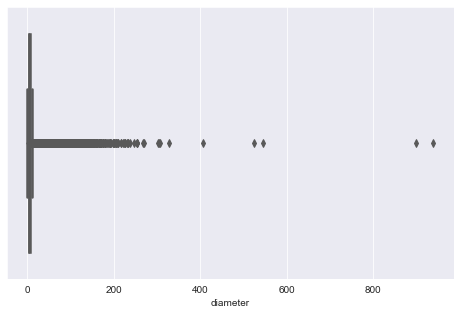

In [315]:
plt.figure(figsize=(8,5))
ax = sns.boxplot(data = num_data,x="diameter",orient="h",linewidth=2.5,palette="Set2")
plt.savefig('diameter_boxplot.png')

In [207]:
from scipy import stats

total_outliers = len(new_df)- len(new_df[(np.abs(stats.zscore(new_df)) < 3).all(axis=1)])

print("Number of outliers : " , total_outliers)

Number of outliers :  5992


In [208]:
new_df = pd.DataFrame(new_df[(np.abs(stats.zscore(new_df)) < 3).all(axis=1)])
new_df.shape

(130807, 9)

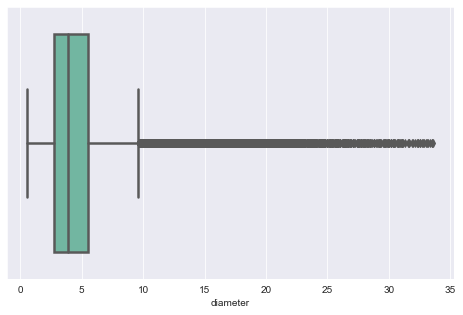

In [316]:
plt.figure(figsize=(8,5))
ax = sns.boxplot(data = new_df,x="diameter",orient="h",linewidth=2.5,palette="Set2")
plt.savefig('diameter_boxplot_cleaned.png')

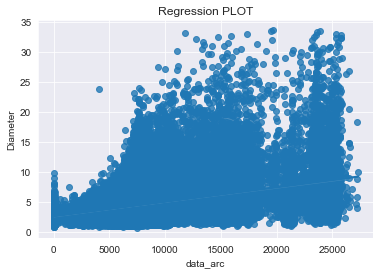

In [317]:
sns.set_style('darkgrid')

sns.regplot(x="data_arc",y="diameter",data=new_df)
plt.xlabel('data_arc')
plt.ylabel('Diameter')
plt.title('Regression PLOT')
plt.savefig('data_arc vs diameter_cleaned.png')
plt.show()

### Scaling the data

In [212]:
scaled_data = pd.DataFrame(StandardScaler().fit_transform(new_df), columns = new_df.columns)
scaled_data

,a,q,data_arc,n_obs_used,H,diameter,moid,neo_Y,pha_Y
0,-1.538299,-1.243929,3.662787,3.164093,-2.406019,0.788395,-1.218612,0.0,0.0
1,-1.179186,-1.202080,3.411170,3.031944,-2.147332,5.662904,-1.173144,0.0,0.0
2,-1.678465,-1.180167,2.839956,3.107735,-1.888644,0.562984,-1.233494,0.0,0.0
3,1.265968,-0.124625,3.480917,2.104963,-3.190705,7.494720,0.027286,0.0,0.0
4,-0.166420,-0.377176,3.372766,3.350655,-2.923395,2.134873,-0.379936,0.0,0.0
...,...,...,...,...,...,...,...,...,...
130802,1.159891,0.787880,-1.316356,-1.115179,0.784462,-0.274206,0.733838,0.0,0.0
130803,-0.666722,-0.063019,-1.112414,-1.148216,1.732983,-0.660574,-0.071347,0.0,0.0
130804,1.086634,0.203542,-1.213502,-1.121009,1.301837,-0.582737,0.122107,0.0,0.0
130805,0.808277,-0.554675,-1.352774,-1.159877,1.646754,-0.458057,-0.617314,0.0,0.0


2.6646235391123545


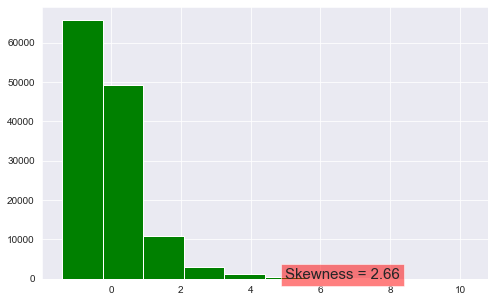

In [318]:
plt.figure(figsize=(8,5))


skew_data = scaled_data['diameter'].skew()
print(skew_data)
# sns.displot(num_data['diameter'])
plt.text(5,5 , 'Skewness = '+str(round(skew_data,2)), fontsize = 15, 
         bbox = dict(facecolor = 'red', alpha = 0.5))
# plt.xlabel('data_arc')
plt.hist(scaled_data['diameter'], color='green')
plt.savefig('diameter_histogram_scaled.png')
plt.show()
# plt.legend()

### Splitting the data

In [226]:
X = scaled_data.drop(['diameter'], axis = 1)
Y = scaled_data.diameter

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state=30)

### Building the models

In [304]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

reg_model = LinearRegression()
reg_model.fit(X_train,y_train)

ridge_reg = Ridge(alpha=0.01)
ridge_reg.fit(X_train,y_train)

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train,y_train)

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train,y_train)


c:\Users\Asus\anaconda3\envs\aivenv\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [305]:
poly_reg = PolynomialFeatures(2)
new_x_train = poly_reg.fit_transform(X_train)
new_x_test = poly_reg.fit_transform(X_test)

poly_reg_model = LinearRegression()
poly_reg_model.fit(new_x_train , y_train)


LinearRegression()

In [324]:
metrics = {}
y_poly_reg_pred = poly_reg_model.predict(new_x_test)
result = {"r2":round(r2_score(y_test,y_poly_reg_pred),3),"mse":round(mean_squared_error(y_test,y_poly_reg_pred),3),"rmse":round(mean_squared_error(y_test,y_poly_reg_pred,squared=False),3),"mae":round(mean_absolute_error(y_test,y_poly_reg_pred),3)}
metrics['poly_reg_model'] = result
metrics

{'poly_reg_model': {'r2': 0.743, 'mse': 0.253, 'rmse': 0.503, 'mae': 0.358}}

### Using Neural Networks

In [307]:
import tensorflow as tf
from tensorflow import keras

In [308]:
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
    ann_model= keras.Sequential([
        #input layer
        keras.layers.Dense(60, input_dim=X_train.shape[1],activation="relu"),
        #hidden layers
        keras.layers.Dropout(0.4), 
        keras.layers.Dense(40,activation="relu"),
        keras.layers.Dropout(0.4), 
        keras.layers.Dense(20,activation="relu"),
        keras.layers.Dropout(0.3),  
        #output layer
        keras.layers.Dense(1, activation='linear')
    ])
    return ann_model

# build the model
ann_model = build_model_using_sequential()

In [309]:
ann_model.compile(loss="mean_squared_error", optimizer='adam', metrics=["mse"])

In [310]:
ann_model.fit(X_train, y_train, epochs=20, batch_size=64,validation_split=0.2)

Epoch 1/20
1309/1309 [==============================] - 4s 2ms/step - loss: 0.4362 - mse: 0.4362 - val_loss: 0.3201 - val_mse: 0.3201
Epoch 2/20
1309/1309 [==============================] - 3s 2ms/step - loss: 0.3426 - mse: 0.3426 - val_loss: 0.2741 - val_mse: 0.2741
Epoch 3/20
1309/1309 [==============================] - 3s 2ms/step - loss: 0.3198 - mse: 0.3198 - val_loss: 0.2609 - val_mse: 0.2609
Epoch 4/20
1309/1309 [==============================] - 3s 2ms/step - loss: 0.3092 - mse: 0.3092 - val_loss: 0.2629 - val_mse: 0.2629
Epoch 5/20
1309/1309 [==============================] - 3s 2ms/step - loss: 0.3071 - mse: 0.3071 - val_loss: 0.2382 - val_mse: 0.2382
Epoch 6/20
1309/1309 [==============================] - 3s 2ms/step - loss: 0.3040 - mse: 0.3040 - val_loss: 0.2429 - val_mse: 0.2429
Epoch 7/20
1309/1309 [==============================] - 3s 2ms/step - loss: 0.2978 - mse: 0.2978 - val_loss: 0.2832 - val_mse: 0.2832
Epoch 8/20
1309/1309 [==============================] - 4s 3ms

In [241]:
ann_model.evaluate(X_test,y_test)

409/409 [==============================] - 1s 2ms/step - loss: 0.2497 - mse: 0.2497


[0.24968810379505157, 0.24968810379505157]

In [235]:
y_pred=ann_model.predict(X_test)
r2_score(y_test,y_pred)

0.7582606781589557

In [289]:
models = {"Linear Regression":reg_model,"Ridge":ridge_reg,"Lasso":lasso_reg,"XGBoost":xgb_reg,"ANN":ann_model}

In [334]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
scoring = ["r2","rmse","mae"]
for index, model in models.items():
    y_pred = model.predict(X_test)
    result = {"r2":round(r2_score(y_test,y_pred),3),"mse":round(mean_squared_error(y_test,y_pred),3),"rmse":round(mean_squared_error(y_test,y_pred,squared=False),3),"mae":round(mean_absolute_error(y_test,y_pred),3)}
    metrics[index] = result

metrics_df = pd.DataFrame(metrics)
metrics_df.head()


c:\Users\Asus\anaconda3\envs\aivenv\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,poly_reg_model,Linear Regression,Ridge,Lasso,XGBoost,ANN
r2,0.743,0.606,0.606,0.585,0.804,0.753
mse,0.253,0.388,0.388,0.409,0.193,0.243
rmse,0.503,0.623,0.623,0.639,0.439,0.493
mae,0.358,0.446,0.446,0.432,0.305,0.346


In [335]:
r2 = metrics_df.loc['r2'].to_dict()
mse = metrics_df.loc['mse'].to_dict()
rmse = metrics_df.loc['rmse'].to_dict()
mae = metrics_df.loc['mae'].to_dict()
# f1_score = metrics_df.loc[''].to_dict()

In [293]:
colors = ['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6', '#ffffcc', '#e5d8bd', '#fddaec', '#f2f2f2']

In [336]:
index = ['r2','MSE','RMSE','MAE']
mets = [r2,mse,rmse,mae]

In [320]:
columns = list(metrics.keys())[1:]
# columns.delete('poly_reg_model')
columns

[]

Bar graph based on the metrics RMSE and MAE

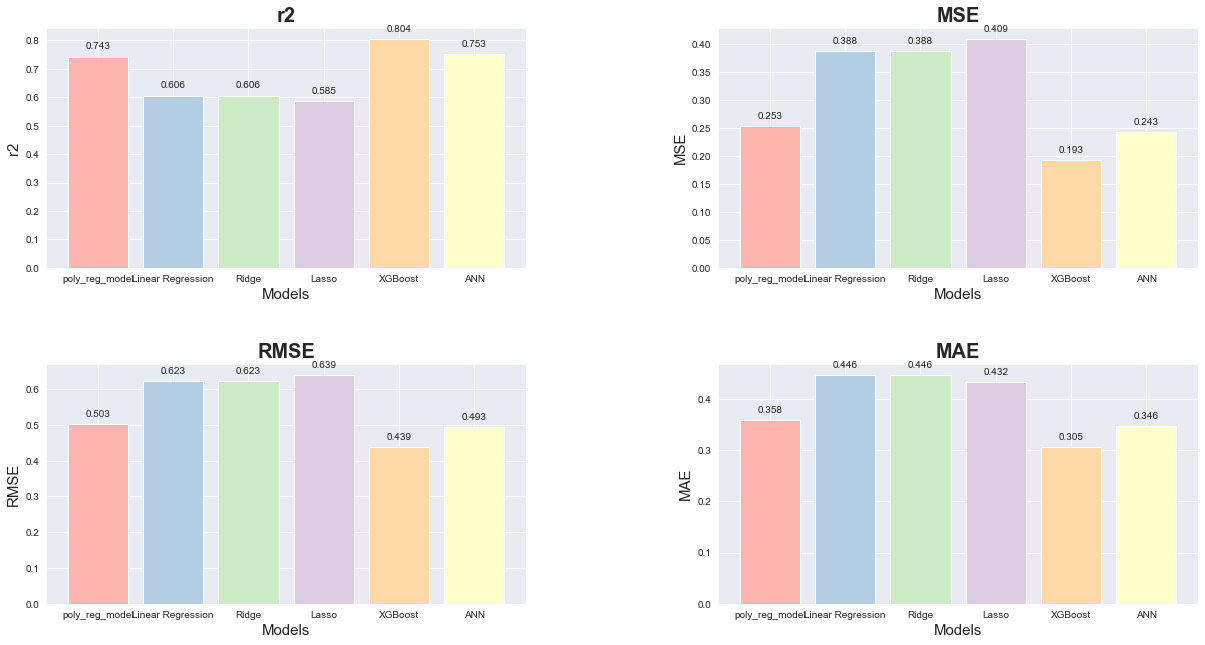

In [337]:
plt.figure(figsize=(20,10))

for i, metric in enumerate(mets):

    ax = plt.subplot(2, 2, i+1)
    ax.bar(list(metric.keys()), list(metric.values()), color=colors, align='center')
    ax.set_title(index[i],fontsize=20,fontweight='bold')
    ax.set_xlabel('Models',fontsize=15)
    ax.set_ylabel(index[i],fontsize=15)
    ax.set_alpha(0.5)
    for bar in ax.patches:
        ax.annotate(str(bar.get_height()), (bar.get_x() + bar.get_width() / 2., bar.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
# plt.title('Model Evaluation',fontsize=20,fontweight='bold')
plt.savefig('metrics.png')
plt.show()